## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
Потребуется изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.
Данные опубликованы на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

### Описание данных 

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

### Шаг 1. Обзор данных. Откроем файлы и объединим их в один.

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Импортируем библиотеки, которые потребуются для работы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

Откроем первый файл и оценим данные в нем.

In [2]:
try: 
    data1 = pd.read_csv('/datasets/mkrf_movies.csv') #Серверный путь
except:
    data1 = pd.read_csv('C:/Users/datasets/mkrf_movies.csv') #Локальный путь
        
data1.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


Второй файл аналогично.

In [3]:
try:
    data2 = pd.read_csv('/datasets/mkrf_shows.csv') #Серверный путь
except:
    data2 = pd.read_csv('C:/Users/datasets/mkrf_shows.csv') #Локальный путь
data2.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Объединять файлы будем по столбцу `puNumber`, но в датасетах этот столбец представлен разными форматами. Просто поменять тип в первом датасете не удалось из-за значения 'нет' в нём. Заменим это значение и переведем формат столбца.

In [6]:
data1.loc[data1['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data1['puNumber'] = data1['puNumber'].mask(data1['puNumber'] == 'нет', 0)

In [8]:
data1['puNumber'] = data1['puNumber'].astype('int64')

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 877.4+ KB


Теперь можно объединить датасеты в один.

In [10]:
data = data1.merge(data2, how = 'left')

#### Выводы

Таблицы объединили. В данных много пропусков в графах с финансированием, возможно, на месте пропусков подразумевается, что финансирование просто отсутствовало из данных источников. Возможно наличие дубликатов, поскольку данные подробно расписаны и могут присутствовать различные записи одного и того же. Есть проблема с форматом столбца с датой, а также стилистические ошибки в названии столбцов.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

Проверим типы данных в датафрейме.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.2+ KB


Видим, что дата представлена в неудобном формате, а также рейтинг хотелось бы представить в числовом формате. Исправим это.

In [12]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Возникает проблема с этим столбцом, данные приведены в виде балла и процента, надо привести их к единому виду. Судя по этим данным и по тому, как обычно оценивают фильмы, максимальный балл составляет 10.0. Приведем всё к единому виду, избавимся от %.

In [13]:
l = [x for x in data.ratings if str(x)[2] == '%']
for x in l:
    data.loc[data.ratings == x, 'ratings'] = np.nan
data.ratings = data.ratings.astype('float')


In [14]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

Заменим формат столбца с датой.

In [15]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format="%Y-%m-%dT%H:%M:%S.000Z")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6490 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(9)
memory usage: 994.2+ KB


In [17]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Посмотрим, в каких столбцах встречаются пропуски.

In [18]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [19]:
data.isna().mean()*100

title                     0.000000
puNumber                  0.000000
show_start_date           0.000000
type                      0.000000
film_studio               0.240449
production_country        0.026717
director                  0.120224
producer                  7.587497
age_restriction           0.000000
refundable_support       95.565055
nonrefundable_support    95.565055
budget                   95.565055
financing_source         95.565055
ratings                  13.304836
genres                   13.037670
box_office               57.814587
dtype: float64

Оценим их процентное содержание.

Мы видим 95% пропусков сразу в четырех столбцах, связанным с финансированием. Здесь логично предположить, что значения отсутствуют там, где изначально отсутствовало финансирование из этого канала. Однако из описания данных знаем, что в столбце `budget` есть сумма только для фильмов с господдержкой. Поэтому, учитывая, что математические действия с NaN возможны, можем оставить пропуски не заполняя, либо заполнить 0. Также большое количество пропусков (58%) в столбце со сборами в рублях. 

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [20]:
data.duplicated().sum()

0

Явных дубликатов нет, попробуем поискать подробнее. По условию, у одного фильма может быть несколько прокатных номеров, но, получается, что одному прокатному номеру соответствует 1 фильм.

In [21]:
data['puNumber'].value_counts().sort_values()

121026619    1
221098811    1
121012216    1
221005815    1
121016310    1
            ..
124000315    1
126001212    1
111013918    1
221154310    2
221054410    2
Name: puNumber, Length: 7484, dtype: int64

In [22]:
data.query('puNumber == 221154310 | puNumber == 221054410')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Судя по всему, была допущена опечатка, поскольку фильмы под этими номерами различны и существуют. Уберем их из датасета, к этим фильмам нет информации о сборах, так что в исследовании они нам не сильно помогут.

In [23]:
data.drop(labels = [4638, 4639, 5067, 5068], inplace = True)

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [24]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [25]:
data['type'] = data['type'].str.strip()

In [26]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [27]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [28]:
data.production_country = data.production_country.str.replace(' ', '').str.strip()

In [29]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР,Венгрия',
       'Германия-Великобритания', 'Великобритания-Италия', 'Чехословакия',
       'США-Франция-Турция', 'НоваяЗеландия', 'Канада-Франция-Испания',
       'США-Германия', 'США-Великобритания', 'Великобритания',
       'Франция-Мексика-США', 'Россия,Казахстан,США', 'СССР,Швеция',
       'СССР,Франция,Англия,Куба,ГДР', 'Германия',
       'Великобритания-США-Германия-КНР', 'СССР,ЧССР,ЗападныйБерлин,ПНР',
       'СССР,Италия', 'Гонконг,КНР', 'США-Франция',
       'США-Япония-Франция-Великобритания',
       'Гонконг-Сингапур-Таиланд-Великобритания', 'США-Канада',
       'Франция-Италия-Великобритания-США', 'Франция-США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР,Финляндия', 'США-Франция-Великобритания-Австрия',
       'США-Бельгия', 'США-Ирландия-Великобритания', 'Великобритания-США',
       'Люксембург-Нидерланды-Испания-Великобритания-США-Италия',
       'Великобритания-Франция-США', 'НоваяЗеландия-США

В столбцах с категориальными переменными встречается много дубликатов, вызванных наличием лишних пробелов и это касается нескольких столбцов.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [30]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.482000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6486.000000,3.158000e+03
mean,1.351326e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.478800,7.647870e+07
std,3.834096e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.101831,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120249e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,1.210154e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.240032e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09


Складывается впечатление, что господдержка составляет обычно как минимум в два раза меньше бюджета фильма, а иногда отличается на порядок.

In [31]:
data.query('budget < (refundable_support + nonrefundable_support)')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


В датасете встречаются 17 фильмов, у которых размер бюджета меньше, чем господдержка, чего быть не может. 

In [32]:
data.query('budget < (refundable_support + nonrefundable_support)')['budget']

2053    0.0
2058    0.0
2472    0.0
2532    0.0
2615    0.0
2684    0.0
2788    0.0
2874    0.0
3047    0.0
3565    0.0
3675    0.0
3739    0.0
5673    0.0
5806    0.0
6008    0.0
6323    0.0
6823    0.0
Name: budget, dtype: float64

Бюджет этих фильмов оказался нулевым, хотя в данных есть информация о господдержке. Для исследования нам требуется информация не только о господдержке, но и о сторонней. Без этого исследование будет неполным. Фильмов с отсутствующим значением всего около 5% от фильмов с ненулевым бюджетом. Поскольку далее мы будем рассматривать фильмы с бюджетом >0, то, в принципе, эти значения нам не мешают.

#### Шаг 2.6. Добавьте новые столбцы





Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [33]:
data['show_start_year'] = data['show_start_date'].dt.year

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [34]:
data['main_genre'] = data['genres'].str.split(',').str[0] 
data['main_director'] = data['director'].str.split(',').str[0]

Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка, мы знаем, что в общий бюджет входит весь объем господдержки + стороннее финансирование и можем найти сумму господдержки из данных.

In [35]:
data['financial_part'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [36]:
data['all_support'] = data['refundable_support'] + data['nonrefundable_support']
data['payback'] = data['box_office'] - data['budget']

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [37]:
data_rental = data.query('box_office > 0')
len(data_rental)/len(data)

0.4188719593691526

Получается, что менее половины фильмов имеют информацию о прокате. Сгруппируем по годам выпуска фильмы и посмотрим когда сколько фильмов выходило.

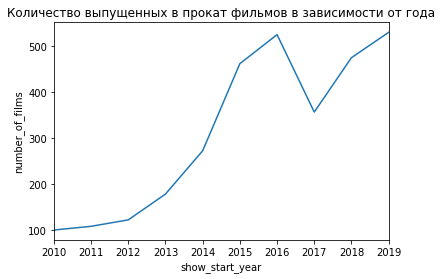

In [38]:
data_rental_pivot_table = data_rental.pivot_table(index = 'show_start_year', values = 'title', aggfunc = 'count')
data_rental_pivot_table.plot(legend = False)
plt.title('Количество выпущенных в прокат фильмов в зависимости от года')
plt.ylabel('number_of_films')
plt.show()

Видим, что c 2010 года число фильмов увеличивается с максимумом в 2016 году (фильмы с указанными суммами проката). Есть локальный минимум в 2017 году.

In [39]:
data_rental.groupby('show_start_year')['title'].count()/len(data_rental)

show_start_year
2010    0.032227
2011    0.034780
2012    0.039247
2013    0.057116
2014    0.087109
2015    0.147415
2016    0.167518
2017    0.113912
2018    0.151563
2019    0.169113
Name: title, dtype: float64

Получается, что за 2015-2019 года представлено значительно больше данных, нежели в 2010-2014.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

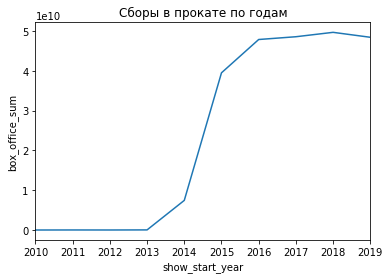

In [40]:
data_box_pivot_table = data.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = 'sum')
data_box_pivot_table.plot(legend = False)
plt.title('Сборы в прокате по годам')
plt.ylabel('box_office_sum')
plt.show()

Судя по всему данные по сборам есть только с 2013 по 2019 года, поскольку всё время до этого сумма сборов составляет 0. При этом мы видим резкий скачок в 2014-2015 годах.Можно сказать, что наименьшие, не равные 0 сборы были в 2014 году, а максимальные в 2018.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [41]:
data_box_pivot_table_sr = data.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = ['mean', 'median'])
data_box_pivot_table_sr.columns = ['mean', 'median']
data_box_pivot_table_sr

,mean,median
show_start_year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000
2018,1.045651e+08,8891102.210


Видим, что в 2010 - 2013 годах сборы были всё-таки не нулевыми, но с подозрительно маленькой суммой. Либо это были совсем провальные фильмы, либо есть какая-то ошибка в порядке записи чисел. Это следовало бы уточнить при выгрузке данных. При этом между средним и медианой достаточно большой разрыв, то есть скорее всего были как и очень удачные фильмы, так и собравшие совсем немного.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Выделим фильмы, вышедшие в 2015-2019 годах.

In [42]:
data_age_restriction = data.query('show_start_year in (2015, 2016, 2017, 2018, 2019)')

In [43]:
data_age_restriction.groupby('age_restriction')['box_office'].sum()

age_restriction
«0+» - для любой зрительской аудитории    8.090774e+08
«12+» - для детей старше 12 лет           6.061945e+10
«16+» - для детей старше 16 лет           7.603473e+10
«18+» - запрещено для детей               4.075962e+10
«6+» - для детей старше 6 лет             5.579861e+10
Name: box_office, dtype: float64

Если смотреть в общем, без разбиения по годам, то видим, что больше всего собирают фильмы с возрастным ограничением 16+. Это может быть связано с тем, что такие фильмы как раз вызывают интерес у молодежи, под такой рейтинг попадает большинство триллеров, детективов, комедий, фантастики, то есть это самое универсальное возрастное ограничение для не совсем детских интересных фильмов при этом без жестокости в сюжете. Меньше всех набирают фильмы 0+, скорее всего это связано с тем, что чаще всего такие фильмы рассчитаны на маленьких детей, что сразу отметает большую часть взрослой и подростковой аудитории. Попробуем посмотреть по годам в отдельности. Рассмотрим количество фильмов в каждый из годов.

In [44]:
data_age_restriction.groupby(['show_start_year', 'age_restriction'])['box_office'].count()

show_start_year  age_restriction                       
2015             «0+» - для любой зрительской аудитории     39
                 «12+» - для детей старше 12 лет            73
                 «16+» - для детей старше 16 лет           168
                 «18+» - запрещено для детей               132
                 «6+» - для детей старше 6 лет              53
2016             «0+» - для любой зрительской аудитории     41
                 «12+» - для детей старше 12 лет            82
                 «16+» - для детей старше 16 лет           182
                 «18+» - запрещено для детей               151
                 «6+» - для детей старше 6 лет              70
2017             «0+» - для любой зрительской аудитории      3
                 «12+» - для детей старше 12 лет            41
                 «16+» - для детей старше 16 лет           121
                 «18+» - запрещено для детей               147
                 «6+» - для детей старше 6 лет              45

Получается, что в некоторых категориях в определенные года было выпущено совсем небольшое количество фильмов, и будет необъективно считать сумму сборов, поэтому найдем медианные сборы по каждой категории.

In [45]:
data_age_restriction.groupby(['show_start_year', 'age_restriction'])['box_office'].median()

show_start_year  age_restriction                       
2015             «0+» - для любой зрительской аудитории    2.943319e+06
                 «12+» - для детей старше 12 лет           1.535156e+07
                 «16+» - для детей старше 16 лет           4.676819e+06
                 «18+» - запрещено для детей               4.616615e+06
                 «6+» - для детей старше 6 лет             2.038098e+07
2016             «0+» - для любой зрительской аудитории    2.571294e+06
                 «12+» - для детей старше 12 лет           4.690635e+06
                 «16+» - для детей старше 16 лет           5.133022e+06
                 «18+» - запрещено для детей               6.107002e+06
                 «6+» - для детей старше 6 лет             3.026256e+06
2017             «0+» - для любой зрительской аудитории    2.217896e+07
                 «12+» - для детей старше 12 лет           9.010548e+06
                 «16+» - для детей старше 16 лет           9.702077e+06
        

Фильмы с возрастным ограничением 0+ стабильно набирают меньше всего во время проката (за исключением 2017 года, видимо, там вышли фильмы, которые пользовались большой популярностью), скорее всего это связано с описанными выше причинами. А вот больше всего в каждый год набирают разные возрастные категории. Возможно, это как-то связано с настроением населения, ситуацией в стране, на такой вывод наталкивает ситуация в 2015 году, этот год можно считать самым сложным из перечисленных, и именно в него лидируют фильмы 6+. Возможно, что просто в разные года выходили хорошие картины под разными возрастными ограничениями и это зависит от качества фильмов в тот или иной промежуток.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Соберем все фильмы с госфинансированием в один датасет, бюджет указан всего лишь у 5% данных.

In [46]:
data_support = data.query('budget >=0')
len(data_support)

332

In [47]:
data_support['ratings'].describe()

count    314.000000
mean       6.000637
std        1.123948
min        1.000000
25%        5.300000
50%        6.200000
75%        6.700000
max        8.500000
Name: ratings, dtype: float64

In [48]:
data_ratings_pivot_table = data_support.pivot_table(index = 'show_start_year', values = 'ratings', aggfunc = ['mean', 'count', 'median'])
data_ratings_pivot_table.columns = ['mean', 'count', 'median']
data_ratings_pivot_table

,mean,count,median
show_start_year,,,
2013,6.700000,2,6.7
2014,6.006667,15,6.4
2015,6.064198,81,6.2
2016,5.677193,57,5.8
2017,6.000000,39,6.2
2018,6.001887,53,6.2
2019,6.176119,67,6.2


Рейтинги оставляют желать лучшего. Фильмы, судя по всему, выходят достаточно посредственными и не могут набрать нормальный рейтинг. Однако встречаются исключения как совсем провальные с рейтингом 1, так и хорошие с рейтингом 8,5.

Посмотрим как распределялся объем финансирования по годам.

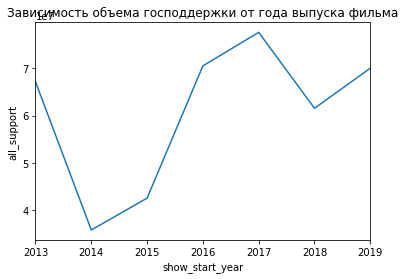

In [49]:
data_financial_pivot_table = data_support.pivot_table(index = 'show_start_year', values = 'all_support')
data_financial_pivot_table.plot(legend = False)
plt.title('Зависимость объема господдержки от года выпуска фильма')
plt.ylabel('all_support')
plt.show()

Получается, что в 2017 году объемы спонсирования были самыми большими, однако этот год не отличился большим количеством фильмов и высокими рейтингами, если сравнивать это со сводной таблицей выше.

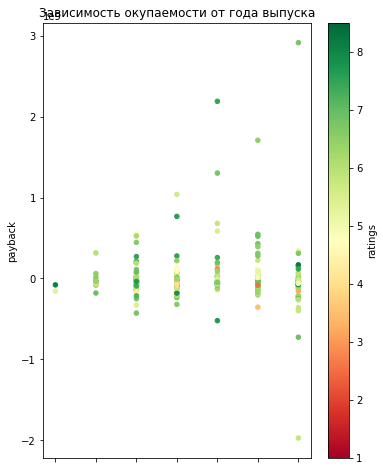

In [50]:
data_support.plot(kind ='scatter', x = 'show_start_year', y = 'payback', c = 'ratings', cmap='RdYlGn', figsize = (6, 8), title = 'Зависимость окупаемости от года выпуска')
plt.show()

Получается, что даже фильмы с относительно неплохим рейтингом часто не окупаются, а большая часть фильмов, судя по всему, выходит в ноль, а то и в отрицательные значения. 

## Общий вывод

Изначально мы получили данные с огромным количеством пропусков в финансировании. После предобработки и добавления требуемых столбцов, мы выявили некоторые интересные вещи:
- сборы фильма сильно зависят от возрастного ограничения, категория 0+ стабильно имеет меньше всего сборов, скорее всего это связано со спецификой сюжетов и тем, что такие фильмы чаще пользуются популярностью у детей.
- фильмы выпускаются в прокат неравномерно в зависимости от года, так, в 2017 году наблюдается минимальное количество выпущенных фильмов, хотя видимых причин для этого нет, однако данные о прокате представлены лишь для половины датасета, возможно, при заполнении неизвестных значений картина бы изменилась.
- если говорить о сборах, то их количество резко возрастает с 2014 года и увеличивается на несколько порядков.

Если говорить о фильмах, получивших государственную поддержку, то:
- рейтинги фильмов составляют обычно около 6, это не особо хороший показатель, который говорит не о самом лучшем их приеме среди публики
- объем финансирования отличается от года к году, так, видим, что в 2014 году наблюдалась минимальная сумма господдержки, а в 2017 ее максимум, хотя нельзя сказать, что в 2017 появилось больше фильмов, чем в другие года, рейтинги их тоже не сильно отличаются
- можно сделать вывод, что окупаемость фильма не сильно зависит от размера вложений в него и рейтинга, есть примеры, когда фильмы с хорошими рейтингами не окупаются, а с плохими выходят в плюс

Сложно сказать, что господдержка сильно влияет на качество фильмов, судя по данным фильмы не сильно окупаются, скорее всего требуется наладить более строгий отбор проектов для финансирования или лучше изучить потребности аудитории и тренжды в кинематографе для финансирования чего-то стоящего.